In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler

import geopandas as gpd
from shapely.geometry import shape, Point

In [2]:
df = pd.read_csv("/Users/rajnishjha/Desktop/GlobalTemperaturesWide.txt")
df.head()

,City,Country,Lat,Lon,AverageDailyUncertainty_Autumn,AverageDailyUncertainty_Spring,AverageDailyUncertainty_Summer,AverageDailyUncertainty_Winter,AverageTemperature_Autumn,AverageTemperature_Spring,...,AverageUncertainty_Summer,AverageUncertainty_Winter,Max_Autumn,Max_Spring,Max_Summer,Max_Winter,Min_Autumn,Min_Spring,Min_Summer,Min_Winter
0,A Coruña,Spain,42.59,-8.73,6.011635,4.912915,9.523013,3.198926,15.077424,12.924667,...,64.719161,19.647887,9.872,10.238,16.458,7.176,9.872,10.238,16.458,7.176
1,Aachen,Germany,50.63,6.34,2.100123,2.092776,4.133204,0.458450,10.357152,9.655111,...,26.470467,3.867369,4.860,1.834,15.101,-2.423,4.860,1.834,15.101,-2.423
2,Aalborg,Denmark,57.05,10.33,2.180351,2.240150,4.582668,0.346778,9.481545,7.674417,...,28.536163,5.524602,2.218,-0.591,13.329,-4.595,2.218,-0.591,13.329,-4.595
3,Aba,Nigeria,5.63,8.07,13.587019,14.748004,11.869634,15.852268,26.866909,28.680722,...,74.286535,99.171792,25.978,27.219,25.587,26.281,25.978,27.219,25.587,26.281
4,Abadan,Iran,29.74,48.00,13.011498,13.381676,20.477302,5.986263,27.734121,26.026333,...,134.570566,37.784325,18.215,18.231,35.314,10.575,18.215,18.231,35.314,10.575


In [3]:
df.shape

(3490, 24)

In [4]:
df = df.drop_duplicates(subset=["Country"],keep='last')

In [5]:
df

,City,Country,Lat,Lon,AverageDailyUncertainty_Autumn,AverageDailyUncertainty_Spring,AverageDailyUncertainty_Summer,AverageDailyUncertainty_Winter,AverageTemperature_Autumn,AverageTemperature_Spring,...,AverageUncertainty_Summer,AverageUncertainty_Winter,Max_Autumn,Max_Spring,Max_Summer,Max_Winter,Min_Autumn,Min_Spring,Min_Summer,Min_Winter
173,Asmara,Eritrea,15.27,39.17,12.257791,19.376241,16.550053,14.648535,24.528121,26.095694,...,119.151695,101.650088,22.699,24.058,25.495,20.757,22.699,24.058,25.495,20.757
225,Baku,Azerbaijan,40.99,48.99,6.078480,4.384790,9.480542,1.035949,14.009606,10.787667,...,60.323076,12.613926,2.829,2.375,19.322,-4.105,2.829,2.375,19.322,-4.105
250,Bangui,Central African Republic,4.02,18.48,12.047115,16.374197,14.451899,18.118205,25.059061,26.858444,...,94.605434,117.385810,24.075,25.474,24.470,23.375,24.075,25.474,24.470,23.375
388,Bissau,Guinea Bissau,12.05,-14.79,11.809087,18.010763,11.825481,14.154305,27.234000,30.507306,...,75.347027,90.972591,26.090,29.555,25.476,24.548,26.090,29.555,25.476,24.548
437,Brazzaville,Congo,-4.02,15.27,13.422330,12.740577,13.885306,13.683452,25.552500,24.653758,...,84.879386,91.106285,24.832,24.208,24.080,21.753,24.832,24.208,24.080,21.753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,Zwolle,Netherlands,52.24,5.26,2.101577,2.046254,3.979174,0.652306,10.928697,9.670194,...,25.327498,4.686401,5.385,2.253,14.702,-1.778,5.385,2.253,14.702,-1.778
3485,Århus,Denmark,57.05,10.33,2.180351,2.240150,4.582668,0.346778,9.481545,7.674417,...,28.536163,5.524602,2.218,-0.591,13.329,-4.595,2.218,-0.591,13.329,-4.595
3487,Çorum,Turkey,40.99,34.08,4.729462,3.449065,8.657670,0.303826,11.901061,10.044222,...,54.966975,7.298845,1.632,1.810,17.412,-4.298,1.632,1.810,17.412,-4.298
3488,Öskemen,Kazakhstan,50.63,82.39,1.191604,0.922183,7.179045,-12.529724,3.766970,3.860500,...,46.075259,104.455190,-8.488,-9.451,14.321,-23.927,-8.488,-9.451,14.321,-23.927


In [6]:
df.shape

(159, 24)

In [7]:
#https://ourworldindata.org/grapher/average-precipitation-per-year
df2 = pd.read_csv("/Users/rajnishjha/Downloads/average-precipitation-per-year.csv")
df2.head()

,Entity,Code,Year,Average precipitation in depth (mm per year)
0,Afghanistan,AFG,1962,327.0
1,Afghanistan,AFG,1967,327.0
2,Afghanistan,AFG,1972,327.0
3,Afghanistan,AFG,1977,327.0
4,Afghanistan,AFG,1982,327.0


In [8]:
df2.shape

(2022, 4)

In [9]:
df2 = df2.drop_duplicates(subset=["Entity"], keep='last')
df2 = df2.drop(['Code', 'Year'],axis=1)

In [10]:
df2

,Entity,Average precipitation in depth (mm per year)
11,Afghanistan,327.0
23,Albania,1485.0
35,Algeria,89.0
47,Angola,1010.0
59,Antigua and Barbuda,1030.0
...,...,...
1973,Venezuela,2044.0
1985,Vietnam,1821.0
1997,Yemen,167.0
2009,Zambia,1020.0


In [11]:
df2.shape

(182, 2)

In [12]:
df2 = df2.rename(columns={'Entity': 'Country', 'Average precipitation in depth (mm per year)': 'AvgPrecipitation'})

In [13]:
result = pd.merge(df, df2,left_on = 'Country',right_on ='Country' )
display(result)

,City,Country,Lat,Lon,AverageDailyUncertainty_Autumn,AverageDailyUncertainty_Spring,AverageDailyUncertainty_Summer,AverageDailyUncertainty_Winter,AverageTemperature_Autumn,AverageTemperature_Spring,...,AverageUncertainty_Winter,Max_Autumn,Max_Spring,Max_Summer,Max_Winter,Min_Autumn,Min_Spring,Min_Summer,Min_Winter,AvgPrecipitation
0,Asmara,Eritrea,15.27,39.17,12.257791,19.376241,16.550053,14.648535,24.528121,26.095694,...,101.650088,22.699,24.058,25.495,20.757,22.699,24.058,25.495,20.757,384.0
1,Baku,Azerbaijan,40.99,48.99,6.078480,4.384790,9.480542,1.035949,14.009606,10.787667,...,12.613926,2.829,2.375,19.322,-4.105,2.829,2.375,19.322,-4.105,447.0
2,Bangui,Central African Republic,4.02,18.48,12.047115,16.374197,14.451899,18.118205,25.059061,26.858444,...,117.385810,24.075,25.474,24.470,23.375,24.075,25.474,24.470,23.375,1343.0
3,Brazzaville,Congo,-4.02,15.27,13.422330,12.740577,13.885306,13.683452,25.552500,24.653758,...,91.106285,24.832,24.208,24.080,21.753,24.832,24.208,24.080,21.753,1646.0
4,Bujumbura,Burundi,-4.02,29.73,13.180010,13.409271,10.924310,16.729413,21.423167,22.185879,...,107.882941,20.550,20.755,20.331,20.384,20.550,20.755,20.331,20.384,1274.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Zwolle,Netherlands,52.24,5.26,2.101577,2.046254,3.979174,0.652306,10.928697,9.670194,...,4.686401,5.385,2.253,14.702,-1.778,5.385,2.253,14.702,-1.778,778.0
142,Århus,Denmark,57.05,10.33,2.180351,2.240150,4.582668,0.346778,9.481545,7.674417,...,5.524602,2.218,-0.591,13.329,-4.595,2.218,-0.591,13.329,-4.595,703.0
143,Çorum,Turkey,40.99,34.08,4.729462,3.449065,8.657670,0.303826,11.901061,10.044222,...,7.298845,1.632,1.810,17.412,-4.298,1.632,1.810,17.412,-4.298,593.0
144,Öskemen,Kazakhstan,50.63,82.39,1.191604,0.922183,7.179045,-12.529724,3.766970,3.860500,...,104.455190,-8.488,-9.451,14.321,-23.927,-8.488,-9.451,14.321,-23.927,250.0


In [14]:
avgpr = result['AvgPrecipitation']

In [15]:
result.isnull().sum()


City                              0
Country                           0
Lat                               0
Lon                               0
AverageDailyUncertainty_Autumn    0
AverageDailyUncertainty_Spring    0
AverageDailyUncertainty_Summer    0
AverageDailyUncertainty_Winter    0
AverageTemperature_Autumn         0
AverageTemperature_Spring         0
AverageTemperature_Summer         0
AverageTemperature_Winter         0
AverageUncertainty_Autumn         0
AverageUncertainty_Spring         0
AverageUncertainty_Summer         0
AverageUncertainty_Winter         0
Max_Autumn                        0
Max_Spring                        0
Max_Summer                        0
Max_Winter                        0
Min_Autumn                        0
Min_Spring                        0
Min_Summer                        0
Min_Winter                        0
AvgPrecipitation                  0
dtype: int64

<AxesSubplot: >

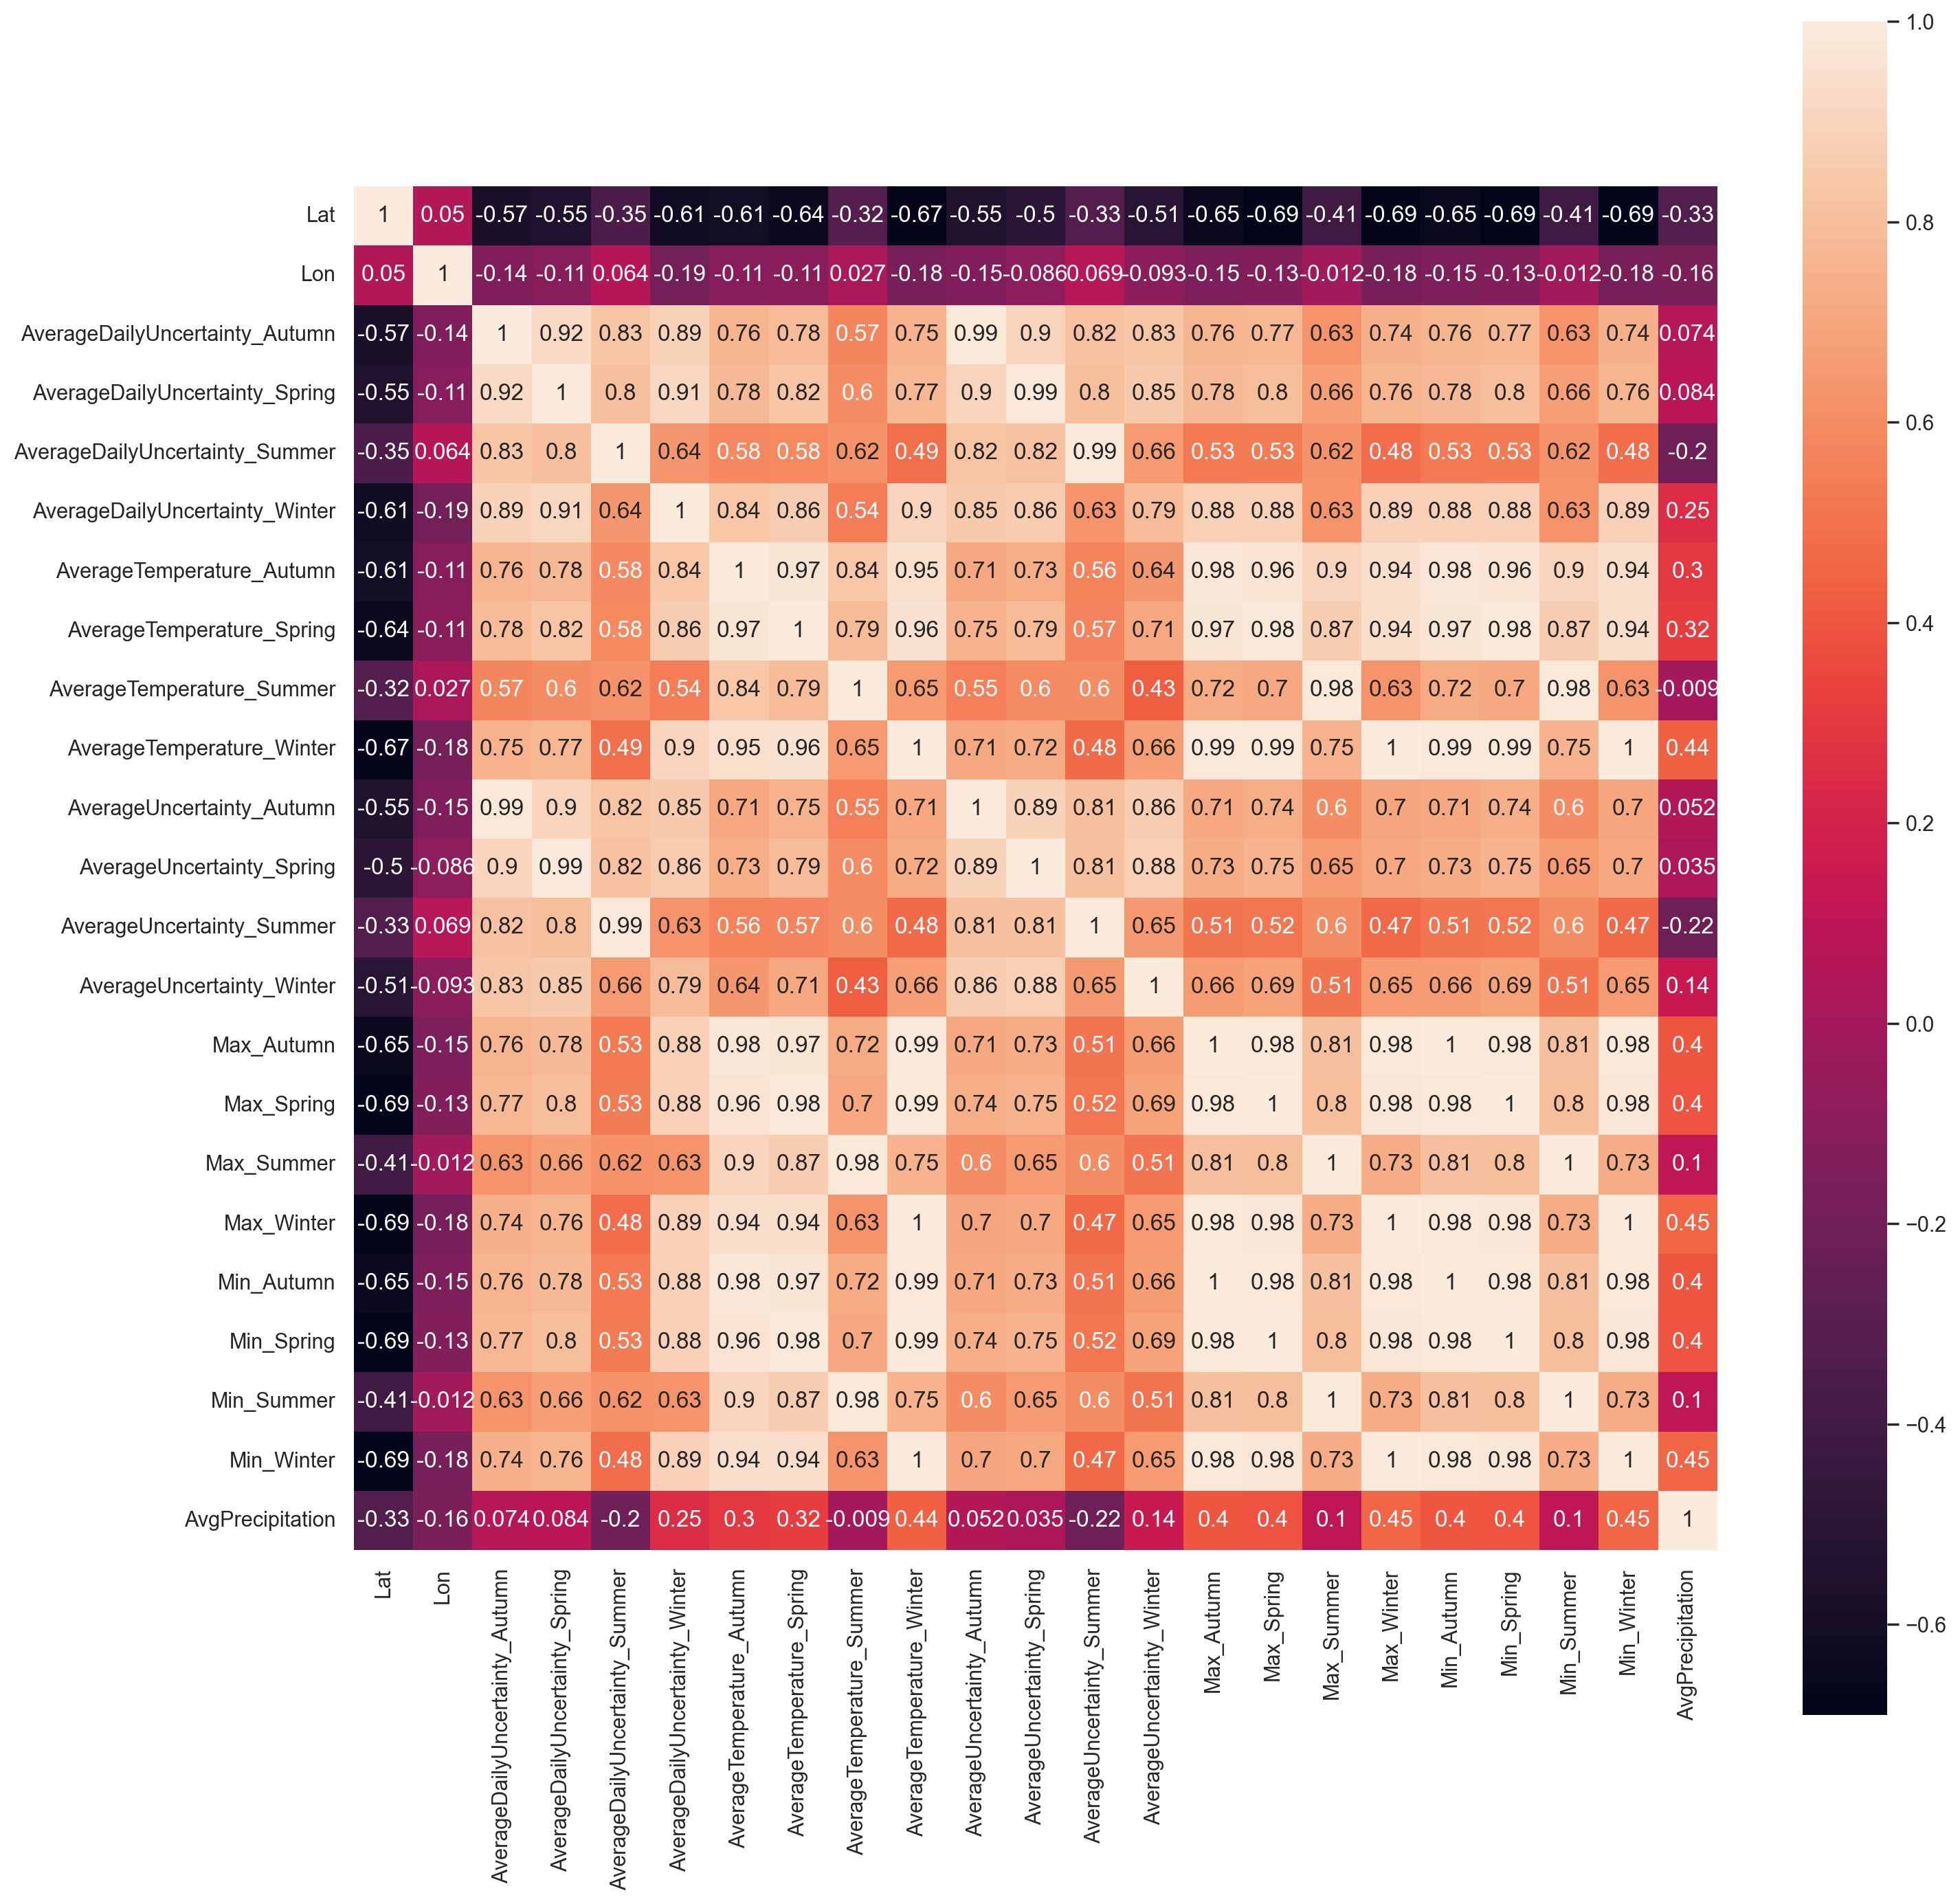

In [16]:
cor = result.corr()
plt.subplots(figsize=(16,16))
sns.heatmap(cor,annot=True, square=True)

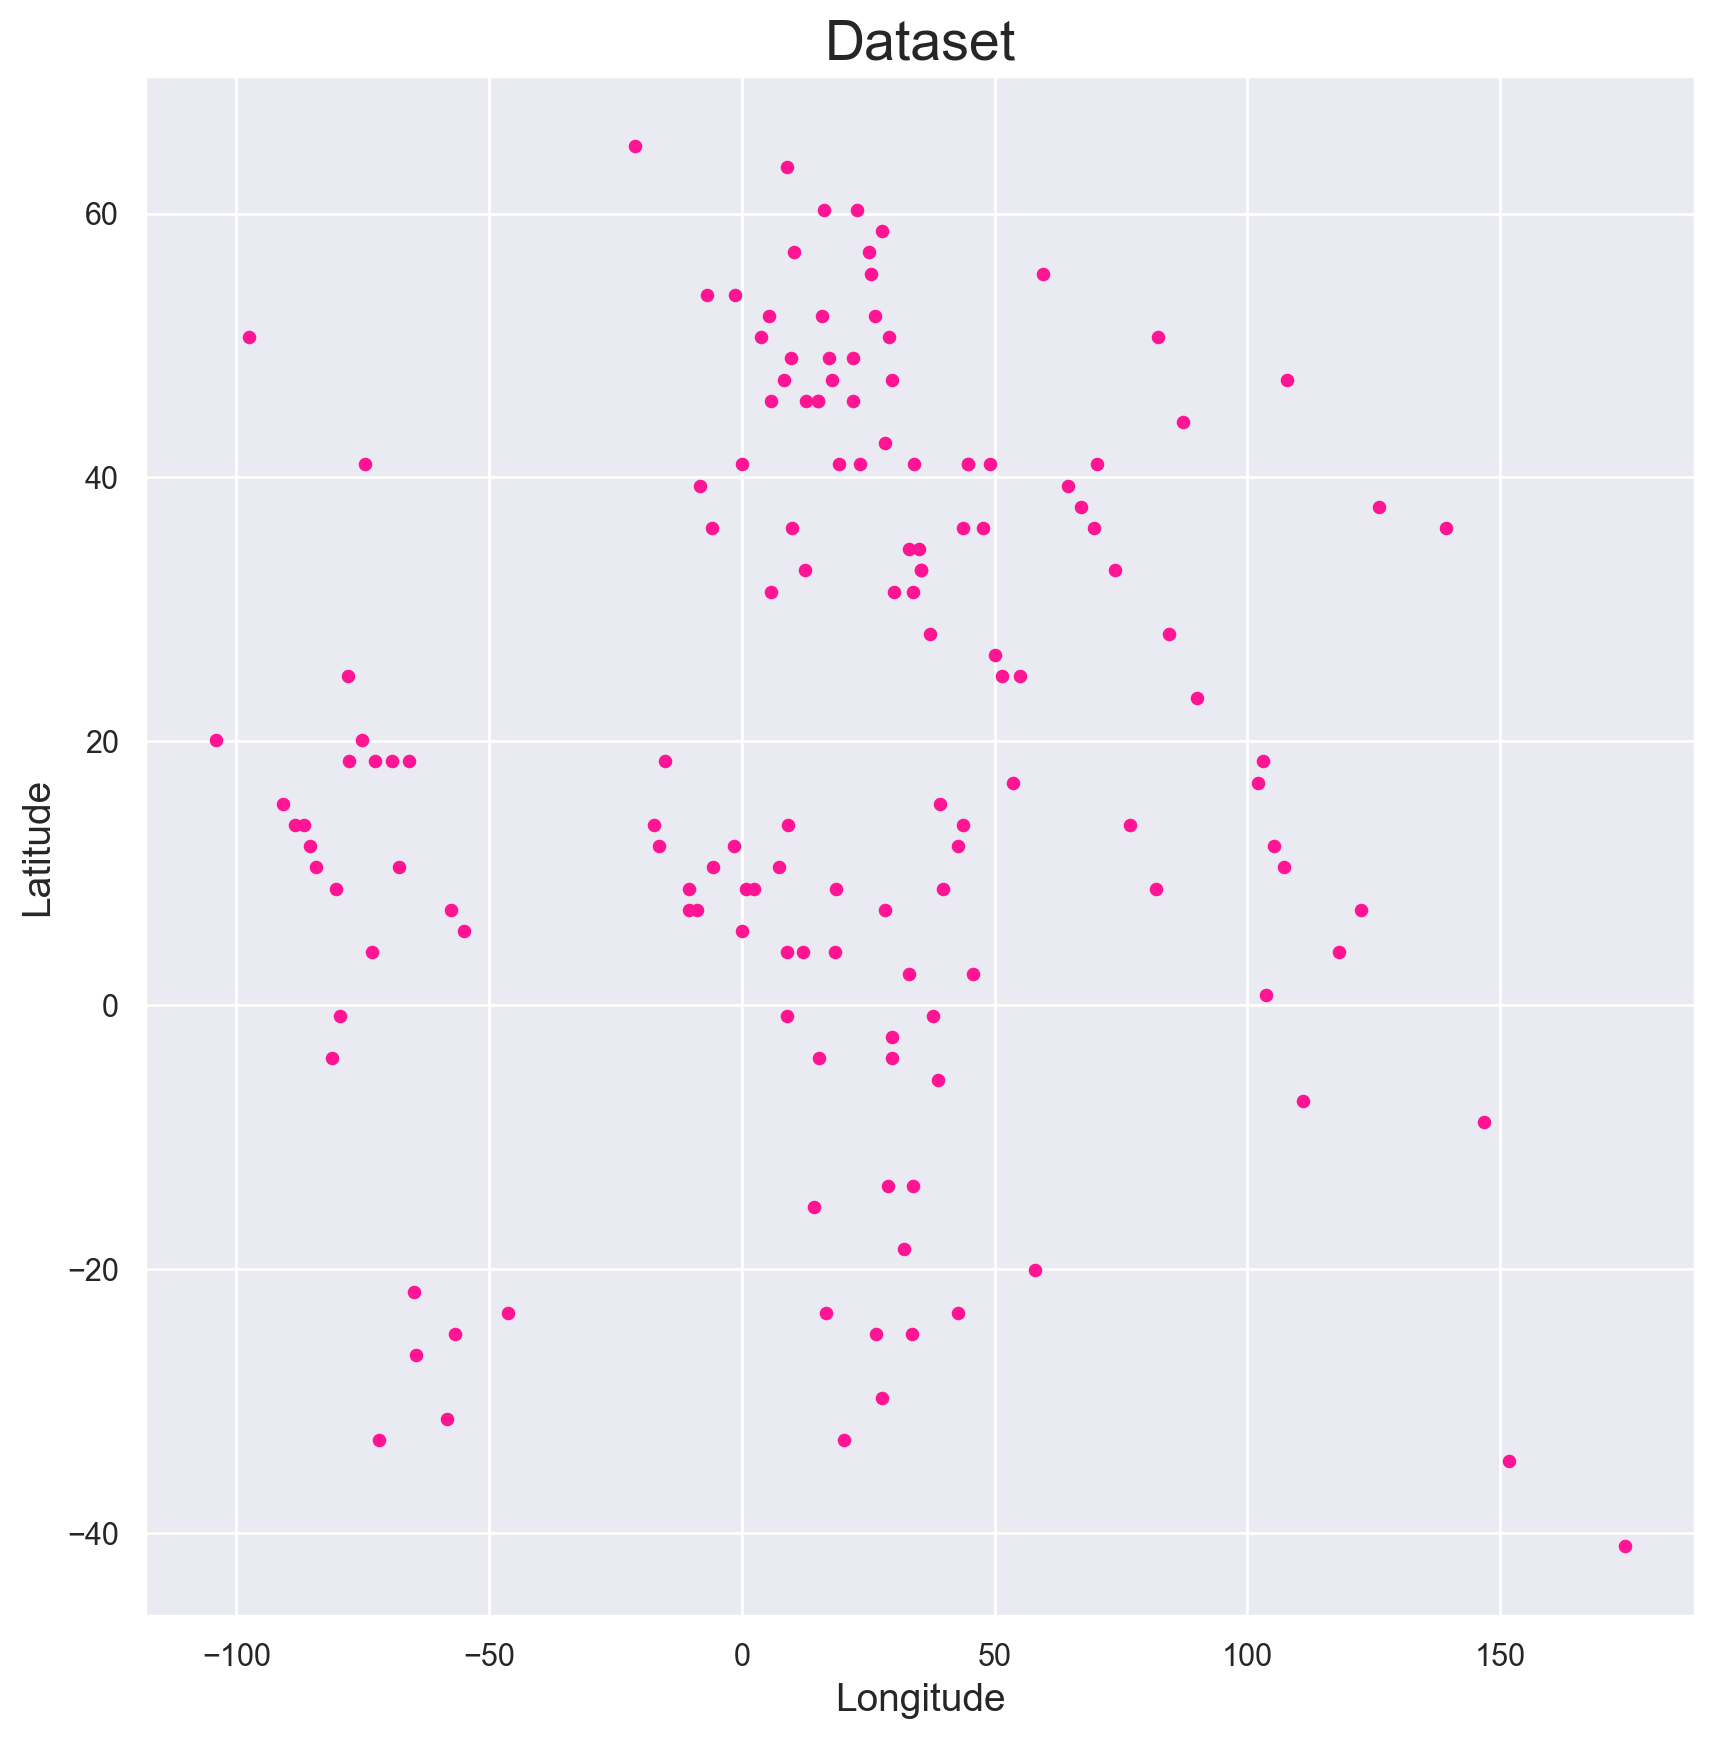

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(result['Lon'],result['Lat'],s=15,color='deeppink')
plt.title('Dataset',fontsize=20)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.show()

In [18]:
result.head()

,City,Country,Lat,Lon,AverageDailyUncertainty_Autumn,AverageDailyUncertainty_Spring,AverageDailyUncertainty_Summer,AverageDailyUncertainty_Winter,AverageTemperature_Autumn,AverageTemperature_Spring,...,AverageUncertainty_Winter,Max_Autumn,Max_Spring,Max_Summer,Max_Winter,Min_Autumn,Min_Spring,Min_Summer,Min_Winter,AvgPrecipitation
0,Asmara,Eritrea,15.27,39.17,12.257791,19.376241,16.550053,14.648535,24.528121,26.095694,...,101.650088,22.699,24.058,25.495,20.757,22.699,24.058,25.495,20.757,384.0
1,Baku,Azerbaijan,40.99,48.99,6.078480,4.384790,9.480542,1.035949,14.009606,10.787667,...,12.613926,2.829,2.375,19.322,-4.105,2.829,2.375,19.322,-4.105,447.0
2,Bangui,Central African Republic,4.02,18.48,12.047115,16.374197,14.451899,18.118205,25.059061,26.858444,...,117.385810,24.075,25.474,24.470,23.375,24.075,25.474,24.470,23.375,1343.0
3,Brazzaville,Congo,-4.02,15.27,13.422330,12.740577,13.885306,13.683452,25.552500,24.653758,...,91.106285,24.832,24.208,24.080,21.753,24.832,24.208,24.080,21.753,1646.0
4,Bujumbura,Burundi,-4.02,29.73,13.180010,13.409271,10.924310,16.729413,21.423167,22.185879,...,107.882941,20.550,20.755,20.331,20.384,20.550,20.755,20.331,20.384,1274.0


In [19]:
data = result[result.columns[4:]]

In [20]:
data

,AverageDailyUncertainty_Autumn,AverageDailyUncertainty_Spring,AverageDailyUncertainty_Summer,AverageDailyUncertainty_Winter,AverageTemperature_Autumn,AverageTemperature_Spring,AverageTemperature_Summer,AverageTemperature_Winter,AverageUncertainty_Autumn,AverageUncertainty_Spring,...,AverageUncertainty_Winter,Max_Autumn,Max_Spring,Max_Summer,Max_Winter,Min_Autumn,Min_Spring,Min_Summer,Min_Winter,AvgPrecipitation
0,12.257791,19.376241,16.550053,14.648535,24.528121,26.095694,26.729611,22.481500,78.045925,142.459713,...,101.650088,22.699,24.058,25.495,20.757,22.699,24.058,25.495,20.757,384.0
1,6.078480,4.384790,9.480542,1.035949,14.009606,10.787667,23.767500,2.100765,38.846781,30.093151,...,12.613926,2.829,2.375,19.322,-4.105,2.829,2.375,19.322,-4.105,447.0
2,12.047115,16.374197,14.451899,18.118205,25.059061,26.858444,25.191583,25.720059,79.234956,111.033412,...,117.385810,24.075,25.474,24.470,23.375,24.075,25.474,24.470,23.375,1343.0
3,13.422330,12.740577,13.885306,13.683452,25.552500,24.653758,24.926147,23.105833,88.693473,83.719873,...,91.106285,24.832,24.208,24.080,21.753,24.832,24.208,24.080,21.753,1646.0
4,13.180010,13.409271,10.924310,16.729413,21.423167,22.185879,21.324765,21.418500,88.343087,86.382077,...,107.882941,20.550,20.755,20.331,20.384,20.550,20.755,20.331,20.384,1274.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2.101577,2.046254,3.979174,0.652306,10.928697,9.670194,17.424167,3.093176,13.099388,13.626480,...,4.686401,5.385,2.253,14.702,-1.778,5.385,2.253,14.702,-1.778,778.0
142,2.180351,2.240150,4.582668,0.346778,9.481545,7.674417,17.049806,1.169618,13.306217,15.986479,...,5.524602,2.218,-0.591,13.329,-4.595,2.218,-0.591,13.329,-4.595,703.0
143,4.729462,3.449065,8.657670,0.303826,11.901061,10.044222,20.940167,1.121706,34.066409,23.768587,...,7.298845,1.632,1.810,17.412,-4.298,1.632,1.810,17.412,-4.298,593.0
144,1.191604,0.922183,7.179045,-12.529724,3.766970,3.860500,17.774417,-15.396559,18.226215,21.412392,...,104.455190,-8.488,-9.451,14.321,-23.927,-8.488,-9.451,14.321,-23.927,250.0


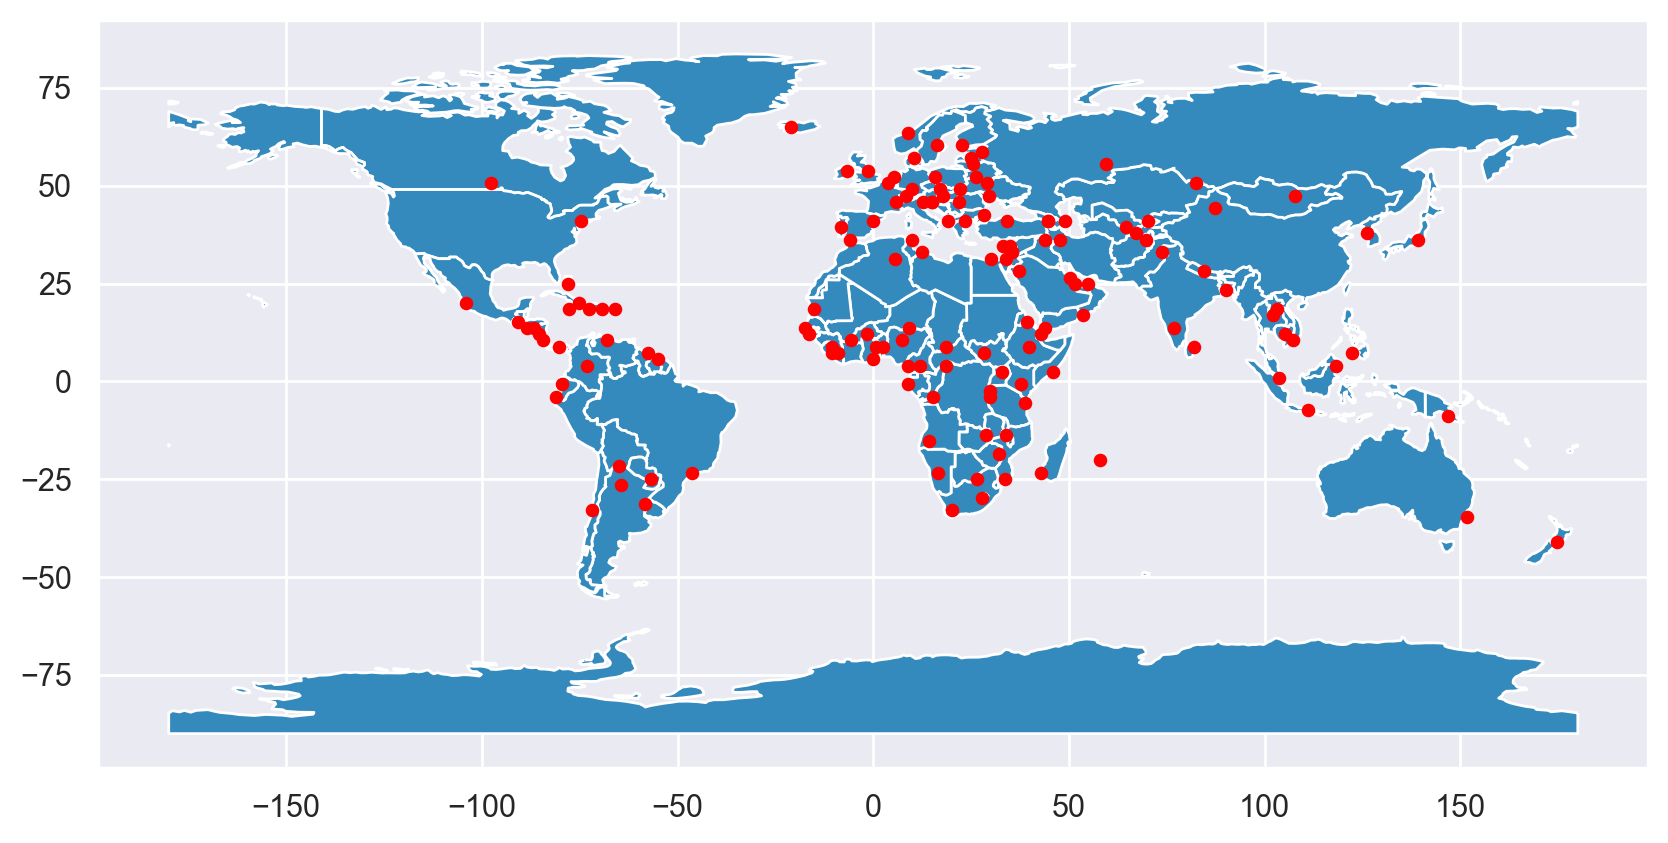

In [21]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(result['Lon'], result['Lat'])]
gdf = GeoDataFrame(result, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [22]:
data

,AverageDailyUncertainty_Autumn,AverageDailyUncertainty_Spring,AverageDailyUncertainty_Summer,AverageDailyUncertainty_Winter,AverageTemperature_Autumn,AverageTemperature_Spring,AverageTemperature_Summer,AverageTemperature_Winter,AverageUncertainty_Autumn,AverageUncertainty_Spring,...,AverageUncertainty_Winter,Max_Autumn,Max_Spring,Max_Summer,Max_Winter,Min_Autumn,Min_Spring,Min_Summer,Min_Winter,AvgPrecipitation
0,12.257791,19.376241,16.550053,14.648535,24.528121,26.095694,26.729611,22.481500,78.045925,142.459713,...,101.650088,22.699,24.058,25.495,20.757,22.699,24.058,25.495,20.757,384.0
1,6.078480,4.384790,9.480542,1.035949,14.009606,10.787667,23.767500,2.100765,38.846781,30.093151,...,12.613926,2.829,2.375,19.322,-4.105,2.829,2.375,19.322,-4.105,447.0
2,12.047115,16.374197,14.451899,18.118205,25.059061,26.858444,25.191583,25.720059,79.234956,111.033412,...,117.385810,24.075,25.474,24.470,23.375,24.075,25.474,24.470,23.375,1343.0
3,13.422330,12.740577,13.885306,13.683452,25.552500,24.653758,24.926147,23.105833,88.693473,83.719873,...,91.106285,24.832,24.208,24.080,21.753,24.832,24.208,24.080,21.753,1646.0
4,13.180010,13.409271,10.924310,16.729413,21.423167,22.185879,21.324765,21.418500,88.343087,86.382077,...,107.882941,20.550,20.755,20.331,20.384,20.550,20.755,20.331,20.384,1274.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2.101577,2.046254,3.979174,0.652306,10.928697,9.670194,17.424167,3.093176,13.099388,13.626480,...,4.686401,5.385,2.253,14.702,-1.778,5.385,2.253,14.702,-1.778,778.0
142,2.180351,2.240150,4.582668,0.346778,9.481545,7.674417,17.049806,1.169618,13.306217,15.986479,...,5.524602,2.218,-0.591,13.329,-4.595,2.218,-0.591,13.329,-4.595,703.0
143,4.729462,3.449065,8.657670,0.303826,11.901061,10.044222,20.940167,1.121706,34.066409,23.768587,...,7.298845,1.632,1.810,17.412,-4.298,1.632,1.810,17.412,-4.298,593.0
144,1.191604,0.922183,7.179045,-12.529724,3.766970,3.860500,17.774417,-15.396559,18.226215,21.412392,...,104.455190,-8.488,-9.451,14.321,-23.927,-8.488,-9.451,14.321,-23.927,250.0


In [23]:
ac_data = data[data.columns[4:]]
temp_scaler = StandardScaler()
hr_data = temp_scaler.fit_transform(ac_data)
hr_data

array([[ 0.62997859,  0.78867367,  0.52530202, ...,  0.60738493,
         0.74319493, -0.90596139],
       [-0.74886014, -1.0582255 , -0.10512012, ..., -0.54964744,
        -1.05183617, -0.8235932 ],
       [ 0.69957775,  0.88069875,  0.19796563, ...,  0.4152647 ,
         0.93221398,  0.34786544],
       ...,
       [-1.02526266, -1.14792137, -0.70685768, ..., -0.90764709,
        -1.06577073, -0.6327082 ],
       [-2.0915348 , -1.89398165, -1.38062001, ..., -1.48700674,
        -2.48298034, -1.08115721],
       [-1.49235679, -1.20989477, -0.19247446, ..., -0.20757972,
        -2.26970217, -0.56472176]])

In [24]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean')
model.fit(hr_data)

AgglomerativeClustering(n_clusters=5)

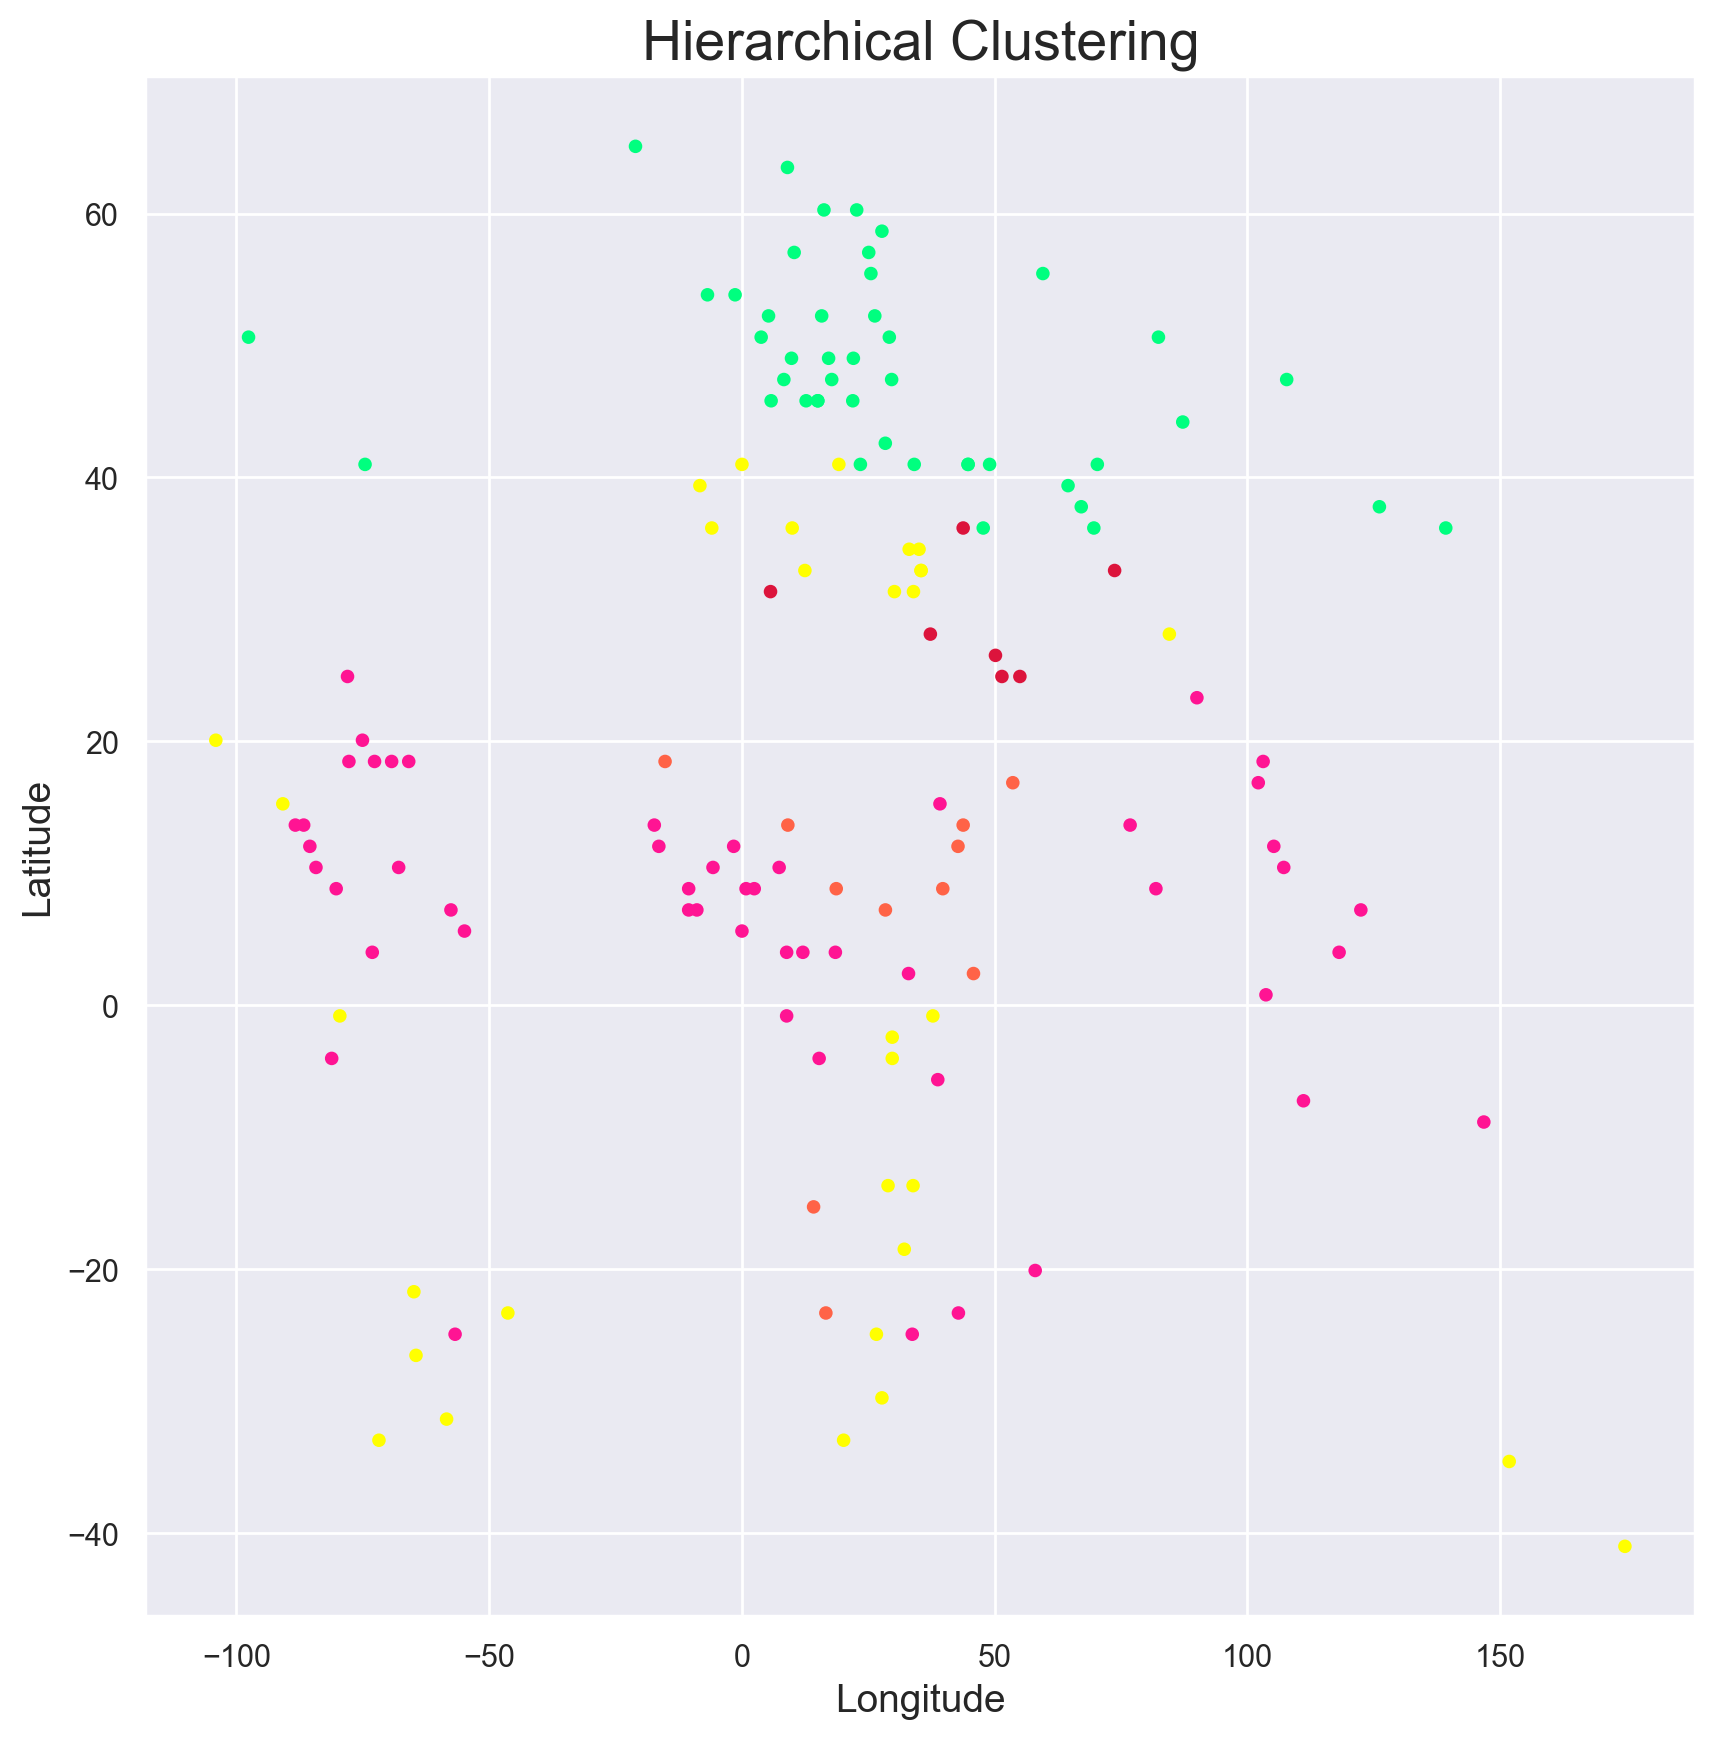

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt

result['HR_Clusters']=model.labels_

# Plotting resulting clusters
plt.figure(figsize=(10,10))
colors=['springgreen','deeppink','yellow','tomato','crimson']
plt.scatter(result['Lon'],result['Lat'],c=result['HR_Clusters'],cmap=mpl.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.show()

In [26]:
result[['Country','HR_Clusters']].sample(10)

,Country,HR_Clusters
37,Suriname,1
57,Ecuador,2
15,Sierra Leone,1
69,Hungary,0
89,Peru,1
47,Kenya,2
100,Austria,0
28,Zimbabwe,2
0,Eritrea,1
40,Gabon,1


In [27]:
result.head()

,City,Country,Lat,Lon,AverageDailyUncertainty_Autumn,AverageDailyUncertainty_Spring,AverageDailyUncertainty_Summer,AverageDailyUncertainty_Winter,AverageTemperature_Autumn,AverageTemperature_Spring,...,Max_Spring,Max_Summer,Max_Winter,Min_Autumn,Min_Spring,Min_Summer,Min_Winter,AvgPrecipitation,geometry,HR_Clusters
0,Asmara,Eritrea,15.27,39.17,12.257791,19.376241,16.550053,14.648535,24.528121,26.095694,...,24.058,25.495,20.757,22.699,24.058,25.495,20.757,384.0,POINT (39.17000 15.27000),1
1,Baku,Azerbaijan,40.99,48.99,6.078480,4.384790,9.480542,1.035949,14.009606,10.787667,...,2.375,19.322,-4.105,2.829,2.375,19.322,-4.105,447.0,POINT (48.99000 40.99000),0
2,Bangui,Central African Republic,4.02,18.48,12.047115,16.374197,14.451899,18.118205,25.059061,26.858444,...,25.474,24.470,23.375,24.075,25.474,24.470,23.375,1343.0,POINT (18.48000 4.02000),1
3,Brazzaville,Congo,-4.02,15.27,13.422330,12.740577,13.885306,13.683452,25.552500,24.653758,...,24.208,24.080,21.753,24.832,24.208,24.080,21.753,1646.0,POINT (15.27000 -4.02000),1
4,Bujumbura,Burundi,-4.02,29.73,13.180010,13.409271,10.924310,16.729413,21.423167,22.185879,...,20.755,20.331,20.384,20.550,20.755,20.331,20.384,1274.0,POINT (29.73000 -4.02000),2


In [28]:
def regioncolors(counter):
    if counter['HR_Clusters'] == 4:
        return 'darkred'
    elif counter['HR_Clusters'] == 2:
        return 'green'
    elif counter['HR_Clusters'] == 3:
        return 'blue'
    elif counter['HR_Clusters'] == 1:
        return 'yellow'
    else:
        return 'orange'
result["Cluster_color"] = result.apply(regioncolors, axis=1)

In [29]:
def regionweather(counter):
    if counter['HR_Clusters'] == 4:
        return ':Hot/Very hot'
    elif counter['HR_Clusters'] == 2:
        return ':Moderate/Pleasant'
    elif counter['HR_Clusters'] == 3:
        return ':Cool/Very Cool'
    elif counter['HR_Clusters'] == 1:
        return ':Moderate/Warm'
    else:
        return ':Moderate/Cold'
result["Cluster_Level"] = result.apply(regionweather, axis=1)

In [30]:
result

,City,Country,Lat,Lon,AverageDailyUncertainty_Autumn,AverageDailyUncertainty_Spring,AverageDailyUncertainty_Summer,AverageDailyUncertainty_Winter,AverageTemperature_Autumn,AverageTemperature_Spring,...,Max_Winter,Min_Autumn,Min_Spring,Min_Summer,Min_Winter,AvgPrecipitation,geometry,HR_Clusters,Cluster_color,Cluster_Level
0,Asmara,Eritrea,15.27,39.17,12.257791,19.376241,16.550053,14.648535,24.528121,26.095694,...,20.757,22.699,24.058,25.495,20.757,384.0,POINT (39.17000 15.27000),1,yellow,:Moderate/Warm
1,Baku,Azerbaijan,40.99,48.99,6.078480,4.384790,9.480542,1.035949,14.009606,10.787667,...,-4.105,2.829,2.375,19.322,-4.105,447.0,POINT (48.99000 40.99000),0,orange,:Moderate/Cold
2,Bangui,Central African Republic,4.02,18.48,12.047115,16.374197,14.451899,18.118205,25.059061,26.858444,...,23.375,24.075,25.474,24.470,23.375,1343.0,POINT (18.48000 4.02000),1,yellow,:Moderate/Warm
3,Brazzaville,Congo,-4.02,15.27,13.422330,12.740577,13.885306,13.683452,25.552500,24.653758,...,21.753,24.832,24.208,24.080,21.753,1646.0,POINT (15.27000 -4.02000),1,yellow,:Moderate/Warm
4,Bujumbura,Burundi,-4.02,29.73,13.180010,13.409271,10.924310,16.729413,21.423167,22.185879,...,20.384,20.550,20.755,20.331,20.384,1274.0,POINT (29.73000 -4.02000),2,green,:Moderate/Pleasant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Zwolle,Netherlands,52.24,5.26,2.101577,2.046254,3.979174,0.652306,10.928697,9.670194,...,-1.778,5.385,2.253,14.702,-1.778,778.0,POINT (5.26000 52.24000),0,orange,:Moderate/Cold
142,Århus,Denmark,57.05,10.33,2.180351,2.240150,4.582668,0.346778,9.481545,7.674417,...,-4.595,2.218,-0.591,13.329,-4.595,703.0,POINT (10.33000 57.05000),0,orange,:Moderate/Cold
143,Çorum,Turkey,40.99,34.08,4.729462,3.449065,8.657670,0.303826,11.901061,10.044222,...,-4.298,1.632,1.810,17.412,-4.298,593.0,POINT (34.08000 40.99000),0,orange,:Moderate/Cold
144,Öskemen,Kazakhstan,50.63,82.39,1.191604,0.922183,7.179045,-12.529724,3.766970,3.860500,...,-23.927,-8.488,-9.451,14.321,-23.927,250.0,POINT (82.39000 50.63000),0,orange,:Moderate/Cold


In [31]:
import folium
locations = result[['Lat','Lon']]
locationlist = locations.values.tolist()


map3 = folium.Map(location=[0,0], tiles='cartodbpositron', zoom_start=7)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point],popup=result.Country[point] + result.Cluster_Level[point] , icon=folium.Icon(color=result["Cluster_color"][point], icon_color='white', icon='star', angle=0, prefix='fa')).add_to(map3)
display(map3)

In [32]:
# Lets print the image

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


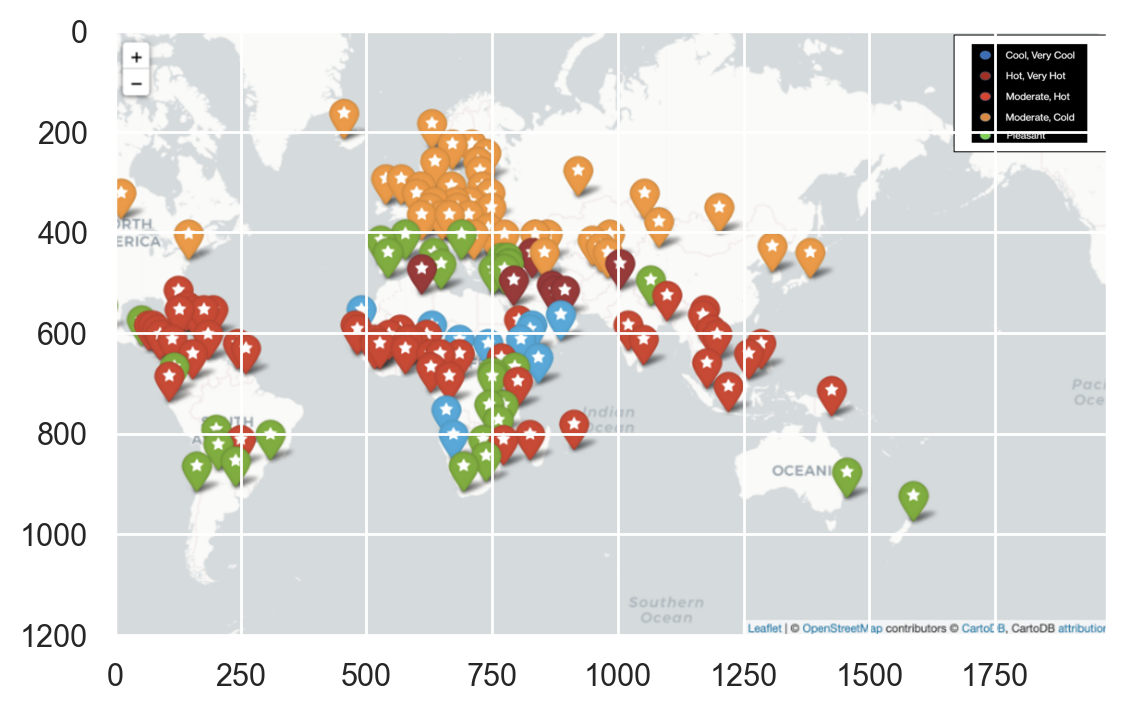

In [33]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/Users/rajnishjha/Desktop/Pictr.png')
imgplot = plt.imshow(img)
plt.show()